# **Pattern Recognition**

## Ioanna Stagona



## **Άσκηση 1**

## **Ερώτημα Α**

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import random as python_random
import numpy as np
import tensorflow as tf


# Ορίζουμε ένα "seed" για επαναληψιμότητα
np.random.seed(42) #numpy
python_random.seed(42) #python
tf.random.set_seed(42) #tensofrlow
seed = 42


# Φόρτωση δεδομένων
iris = load_iris()
data = iris.data #δείγματα
labels = iris.target #ετικέτες

# Διαχωρισμός των δεδομένων σε σετ εκπαίδευσης και δοκιμής
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=seed)


**One hot αναπαράσταση των ετικετών**

Η χρήση κάποιων συναρτήσεων ενεργοποίησης καθώς και συναρτήσεων απωλείων , απαιτεί την one hot κωδικοποίηση των ετικετών ,για τον λόγο αυτό θα πρέπει να γίνουν οι κατάλληλες μετατροπές.

Στην one-hot encoding, κάθε κατηγορία μετατρέπεται σε ένα διάνυσμα όπου:

Ένα (1) τοποθετείται στη θέση που αντιστοιχεί στην κατηγορία της ετικέτας.
Μηδενικά (0) τοποθετούνται σε όλες τις άλλες θέσεις.
Για παράδειγμα, στο πρόβλημα ταξινόμησης με τρεις πιθανές κατηγορίες (κλάσεις), η one-hot encoding θα μετατρέψει τις ετικέτες αυτές σε διανύσματα τριών διαστάσεων:

Κατηγορία 1: [1, 0, 0]

Κατηγορία 2: [0, 1, 0]

Κατηγορία 3: [0, 0, 1]

In [ ]:
from keras.utils import to_categorical

# Μετατροπή των ετικετών σε μορφή one-hot encoding
train_labels_categorical = to_categorical(train_labels, num_classes=3)
test_labels_categorical = to_categorical(test_labels, num_classes=3)


## **Ερώτημα Β**

**Δημιουργία Νευρωνικού δικτύου**

Παρακάτω πραγματοποιείται η δημιουργία ενός νευρωνικού δικτύου (Neural Network) με τη χρήση της βιβλιοθήκης Keras πάνω στο TensorFlow. Ακολουθεί μια περίληψη της διαδικασίας:

Δημιουργία του Μοντέλου: Αρχικοποιείται ένα νευρωνικό δίκτυο χρησιμοποιώντας την κλάση Sequential του Keras. Τα μοντέλα Sequential είναι γραμμικά στοιβαγμένα επίπεδα νευρώνων, όπου η έξοδος ενός επιπέδου αποτελεί την είσοδο του επόμενου.

**Πρώτο Επίπεδο:** Προστίθεται ένα πλήρως συνδεδεμένο επίπεδο (Dense) με 30 νευρώνες. Χρησιμοποιείται η συνάρτηση ενεργοποίησης **sigmoid**.
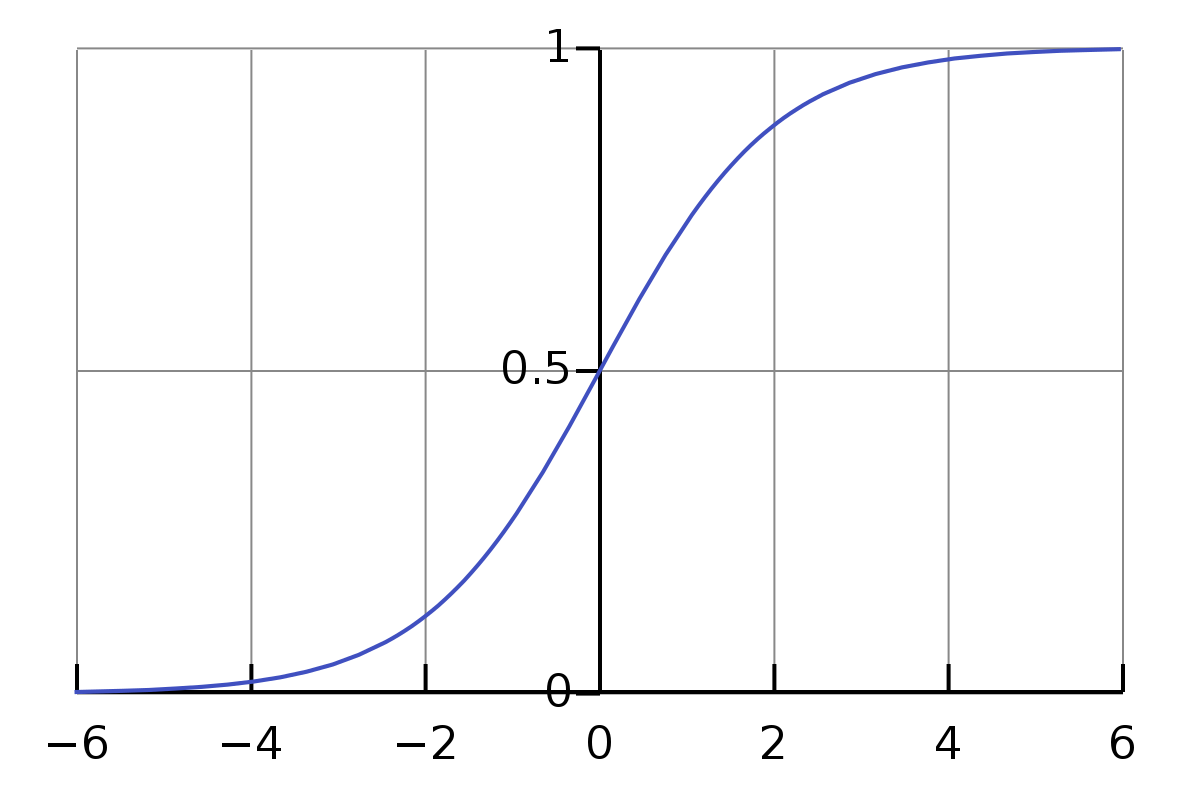

Το input_shape=(4,) καθορίζει ότι η είσοδος θα έχει διάσταση 4, που αντιστοιχεί στα χαρακτηριστικά του Iris dataset.Δεν χρειάζεται στο Keras να ορίσουμε ξεχωριστό input layer, απλά ορίζουμε το μέγεθος εισόδου στο πρώτο επίπεδο .

**Δεύτερο Επίπεδο (Επίπεδο Εξόδου):** Προστίθεται ένα ακόμη πλήρως συνδεδεμένο επίπεδο με 3 νευρώνες(όσες και οι κλάσεις του Ιris Dataset), που χρησιμοποιεί τη συνάρτηση ενεργοποίησης softmax.  Η συνάρτηση softmax επιστρέφει ένα διάνυσμα πιθανοτήτων, όπου κάθε τιμή αντιστοιχεί στην πιθανότητα του εκάστοτε δείγματος να ανήκει σε κάθε μία από τις υπάρχουσες κλάσεις.

Στο μοντέλο χρησιμοποιείται η συνάρτηση σφάλματος **categorical_crossentropy**, η οποία απαιτεί one- hot κωδικοποίηση ,  ο αλγόριθμος βελτιστοποίησης **Adam**, και ως μετρική αξιολόγησης η **accuracy**.

In [ ]:
#ΝΝ
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense,Activation,Dropout


#υπολογισμός χαρακτηριστικών
numofchar = data.shape[1]

#Δημιουργία του μοντέλου
model_sigmoid = models.Sequential()

#Tο πρώτο layer
# Θέτουμε το input_shape στη διάσταση των χαρακτηριστικών του dataset Iris - numofchar(4)
model_sigmoid.add(layers.Dense(30, input_shape=(numofchar,), activation='sigmoid')) #πλήρως συνδεδεμένο επίπεδο με 30 νευρώνες

# Δεύτερο layer  - output layer
model_sigmoid.add(layers.Dense(3,activation='softmax'))  # Επίπεδο εξόδου για ταξινόμηση σε 3 κλάσεις (num of classes)

# Παράμετροι του μοντέλου
model_sigmoid.compile(loss='categorical_crossentropy', #συνάρτηση σφάλματος
              optimizer=optimizers.Adam(),#ποιός είναι ο αλγόριθμος που θέλω να ακολουθήσω για το training
              metrics=['accuracy'])#μετρική που θέλω να υπολογίσω

#Αποτύπωση της περίληψης του μοντέλου
model_sigmoid.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                150       
                                                                 
 dense_9 (Dense)             (None, 3)                 93        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Η μέθοδος fit χρησιμοποιείται για να εκπαιδεύσει το μοντέλο στα δεδομένα εκπαίδευσης (train_data και train_labels_categorical). Τα δεδομένα εκπαίδευσης έχουν μετατραπεί σε **one-hot encoded labels**. Ορίζουμε τον αριθμό των συνολικών εποχών ίσο με 50. Δηλαδή , το μοντέλο θα ανατρέξει 50 φορές το σύνολο των δεδομένων εκπαίδευσης . Επιπλέον , ορίζουμε ως batch_size =10 ,δηλαδή τον αριθμό των δειγμάτων που θα επεξεργάζεται το μοντέλο σε κάθε βήμα της εκπαίδευσης .


Μετά την εκπαίδευση, η μέθοδος evaluate χρησιμοποιείται για να αξιολογήσει την απόδοση του μοντέλου στο σετ δοκιμής. Αυτό παράγει δύο τιμές:

**loss**: Η τιμή της συνάρτησης απώλειας (loss function) που χρησιμοποιήθηκε κατά την εκπαίδευση, σε αυτή την περίπτωση την categorical_crossentropy.

**accuracy**: Το ποσοστό των σωστά ταξινομημένων δειγμάτων (πόσο καλά το μοντέλο προβλέπει τις σωστές κατηγορίες).

In [ ]:
# Εκπαίδευση του μοντέλου
history = model_sigmoid.fit(train_data, train_labels_categorical,validation_data=(test_data,test_labels_categorical), epochs=50, batch_size=10 )

# Αξιολόγηση του μοντέλου
loss, accuracy = model_sigmoid.evaluate(test_data, test_labels_categorical)

Epoch 1/50
12/12 [==============================] - 2s 17ms/step - loss: 1.0782 - accuracy: 0.3250 - val_loss: 1.0424 - val_accuracy: 0.3667
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 1.0383 - accuracy: 0.3583 - val_loss: 1.0180 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0115 - accuracy: 0.6167 - val_loss: 0.9930 - val_accuracy: 0.7000
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9869 - accuracy: 0.6833 - val_loss: 0.9698 - val_accuracy: 0.8333
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9628 - accuracy: 0.8417 - val_loss: 0.9452 - val_accuracy: 0.8000
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9383 - accuracy: 0.8417 - val_loss: 0.9219 - val_accuracy: 0.9333
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9147 - accuracy: 0.8417 - val_loss: 0.8969 - val_accuracy: 0.8333
Epoch 8/50
12/12 [=

## **Ερώτημα Γ**

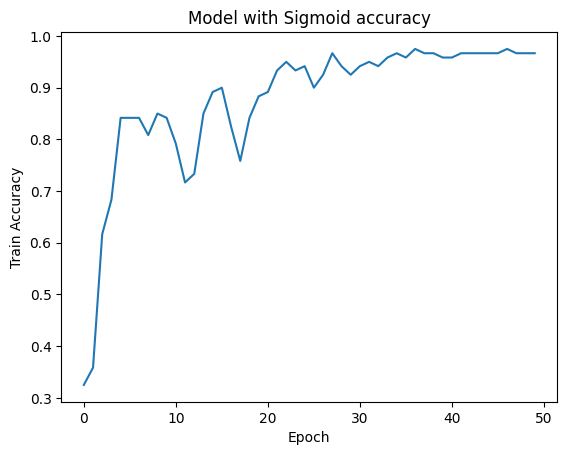

1/1 [==============================] - 0s 44ms/step
Πίνακας Σύγχυσης χρησιμοποιώντας Sigmoid: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Δημιουργία διαγράμματος για το test accuracy
plt.plot(history.history['accuracy'])
plt.title('Model with Sigmoid accuracy')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.show()

# Υπολογισμός του πίνακα σύγχυσης
labels_predicted =np.argmax(model_sigmoid.predict(test_data),axis=1) #Ετικέτες που πρόβλεψε το μοντέλο
true_labels=np.argmax(test_labels_categorical,axis=1) #Πραγματικές Ετικέτες
confusion_matrix_sigmoid = confusion_matrix(true_labels, labels_predicted) #πίνακας Σύγχυσης

print('Πίνακας Σύγχυσης χρησιμοποιώντας Sigmoid: \n' ,confusion_matrix_sigmoid)


**Σχόλια - Παρατηρήσεις**

Η ακρίβεια εκπαίδευσης αυξάνεται γρήγορα στις πρώτες εποχές και φτάνει σε ένα υψηλό επίπεδο, στη συνέχεια σταθεροποιείται με ορισμένες μικρές διακυμάνσεις. Αυτό σημαίνει ότι το μοντέλο εκπαιδεύεται καλά και φτάνει σε ένα σημείο όπου κάνει συνεπείς και ακριβείς προβλέψεις στο σετ εκπαίδευσης.

Παρατηρούμε πολύ υψηλή απόδοση στο μοντέλο, με μόνο ένα δείγμα από το σετ δοκιμής να έχει κατηγοριοποιηθεί λανθασμένα. !


## **Ερώτημα Δ**

Επανάληψη της εκπαίδευσης με συνάρτηση ενεργοποίησης την ReLU

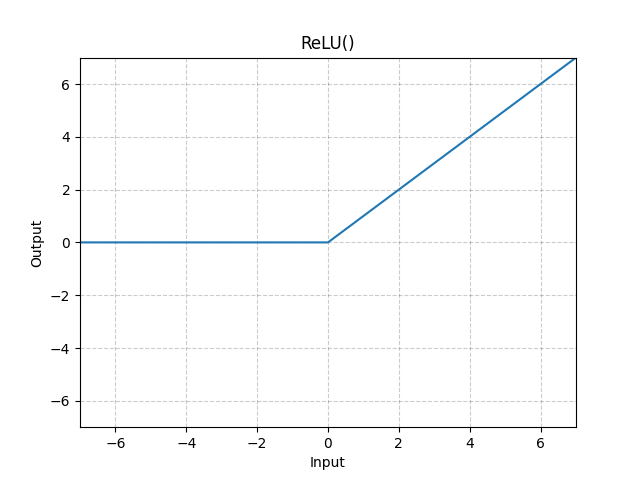



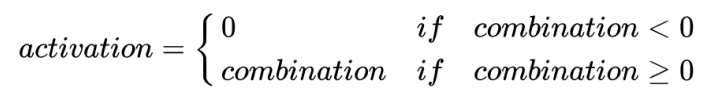

In [ ]:
#Δημιουργία του μοντέλου

model_relu = models.Sequential()

#Tο πρώτο layer
# Θέτουμε το input_shape στη διάσταση των χαρακτηριστικών του dataset Iris - numofchar(4)
model_relu.add(layers.Dense(30, input_shape=(4,), activation='relu')) #πλήρως συνδεδεμένο επίπεδο με 30 νευρώνες

# Δεύτερο layer  - output layer
model_relu.add(layers.Dense(3,activation='softmax'))  # Επίπεδο εξόδου για ταξινόμηση σε 3 κλάσεις (num of classes)

model_relu.compile(loss='categorical_crossentropy',#ποιά είναι η συνάρτηση απωλειών
               optimizer=optimizers.Adam(),#ποιός είναι ο αλγόριθμος που θέλω να ακολουθήσω για το training
              metrics=['accuracy'])#μετρική που θέλω να υπολογίσω
model_relu.summary()


# Εκπαίδευση του μοντέλου
history_relu = model_relu.fit(train_data, train_labels_categorical,validation_data=(test_data,test_labels_categorical), epochs=50, batch_size=10,verbose = 1 )

# Αξιολόγηση του μοντέλου
loss_relu, accuracy_relu = model_relu.evaluate(test_data, test_labels_categorical)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                150       
                                                                 
 dense_11 (Dense)            (None, 3)                 93        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 2.1178 - accuracy: 0.3417 - val_loss: 1.9518 - val_accuracy: 0.3000
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1.8190 - accuracy: 0.3417 - val_loss: 1.6767 - val_accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.6108 - accuracy: 0.4583 - val_loss: 1.4707 - val_accuracy

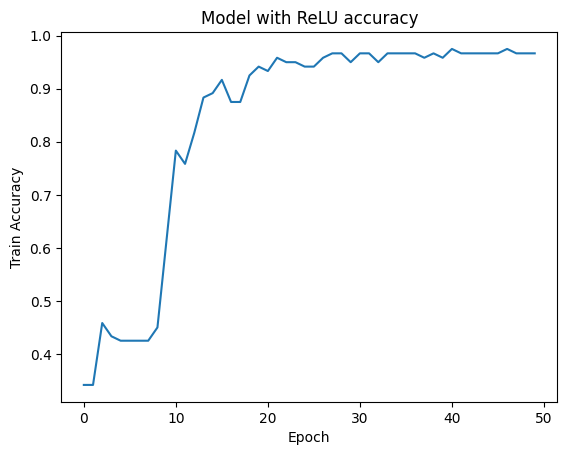

1/1 [==============================] - 0s 49ms/step
Πίνακας Σύγχυσης χρησιμοποιώντας ReLU: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [ ]:
# Δημιουργία διαγράμματος για το test accuracy
plt.plot(history_relu.history['accuracy'])
plt.title('Model with ReLU accuracy')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.show()

# Υπολογισμός του πίνακα σύγχυσης
labels_predicted =np.argmax(model_relu.predict(test_data),axis=1) #Ετικέτες που πρόβλεψε το μοντέλο
true_labels=np.argmax(test_labels_categorical,axis=1) #Πραγματικές Ετικέτες
confusion_matrix_relu = confusion_matrix(true_labels, labels_predicted) #πίνακας Σύγχυσης

print('Πίνακας Σύγχυσης χρησιμοποιώντας ReLU: \n' ,confusion_matrix_relu)

Ο πίνακας σύγχυσης στο μοντέλο με την ReLU παραμένει ο ίδιος . Η ακρίβεια εκπαίδευσης φαίνεται να αυξάνεται πιο γρήγορα στις πρώτες εποχές σε σύγκριση με το Sigmoid, φτάνοντας στην ίδια "ζώνη" ακρίβειας. Επίσης, παρουσιάζει λιγότερες διακυμάνσεις και πιο ομαλή καμπύλη μετά την αρχική άνοδο. Επιπλέον , το μοντέλο με ReLU συγκλίνει σε μια περιοχή τιμών γρηγορότερα σε σχέση με το ίδιο μοντέλο χρησιμοποιώντας sigmoid , λόγω της υπολογιστικής αποδοτικότητας και απλότητας της ReLU .

## **Ερώτημα Ε**

Αρχικά, τα παραπάνω μοντέλα πετυχαίνουν εξαιρετικά υψηλή απόδοση. Για το συγκεκριμένο dataset δεν θα σημιουργήσουμε κάποιο άλλο μοντέλο . Θα αποτυπώσουμε τις καμπύλες precision - recall χρησιμοποιώντας το μοντέλο με την συνάρτηση ενεργοποίησης ReLU .
Σημειώνουμε ότι:

**Precision**: Είναι το ποσοστό των αληθώς θετικών προβλέψεων επί του συνόλου των θετικών προβλέψεων. Δείχνει πόσο αξιόπιστες είναι οι θετικές προβλέψεις του μοντέλου.

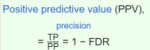


**Recall** : Είναι το ποσοστό των αληθώς θετικών προβλέψεων επί του συνόλου των πραγματικών θετικών περιπτώσεων. Αναφέρεται στην
ικανότητα του μοντέλου να ανιχνεύει όλα τα θετικά αποτελέσματα.

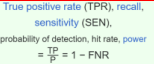


**Area under the ROC curve (AUC)** : Είναι μια μετρική που χρησιμοποιείται για να καθορίσει πόσο καλά το μοντέλο διακρίνει μεταξύ δύο κλάσεων. Ιδανικά, ένα  μοντέλο με AUC ίσο με 1 διακρίνει τέλεια τις κλάσεις .

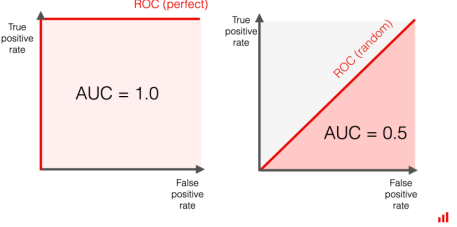

1/1 [==============================] - 0s 21ms/step


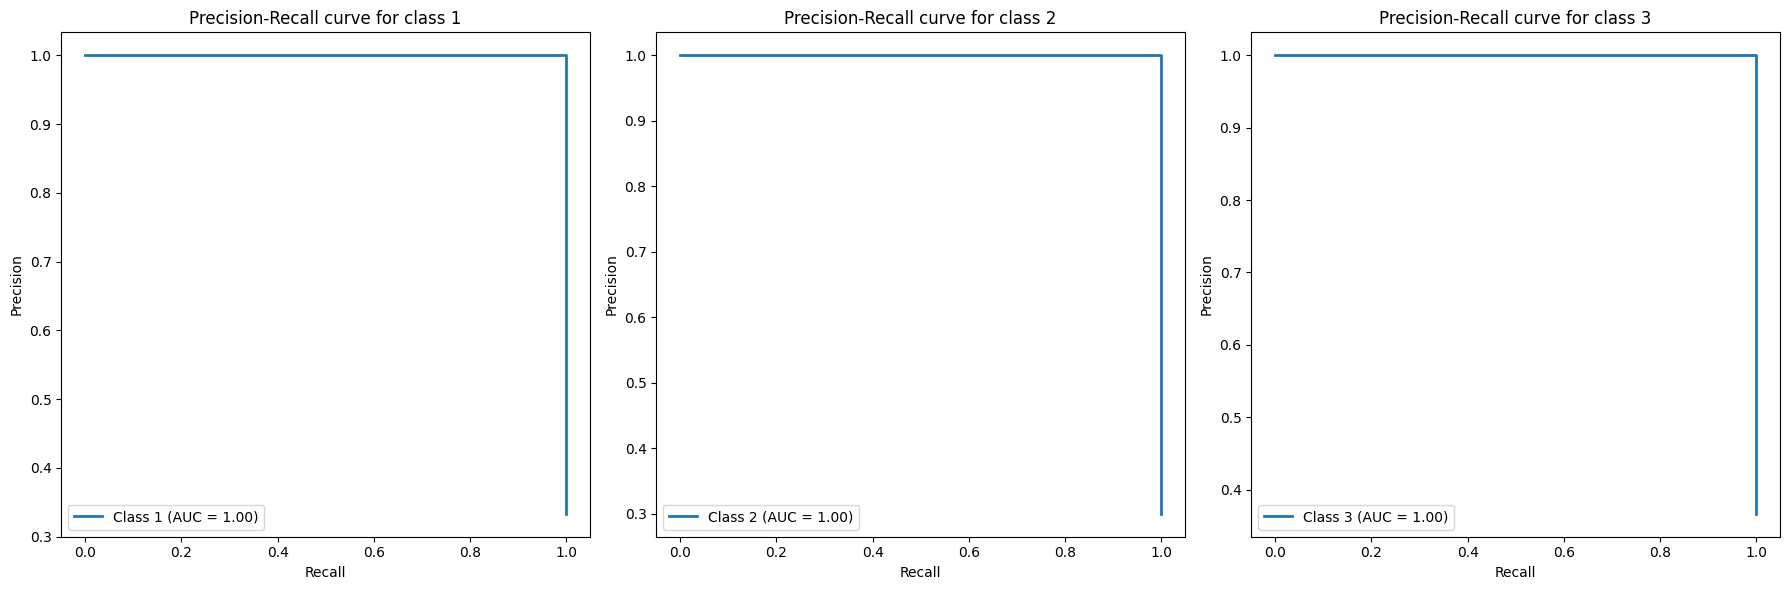

In [ ]:
from sklearn.metrics import precision_recall_curve, auc


# Υπολογισμός των προβλέψεων πιθανοτήτων από το μοντέλο
probabilities = model_relu.predict(test_data)


# Εμφάνιση των καμπυλών σε ξεχωριστά subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Ορισμός του πλέγματος για τα subplots

# Υπολογισμός καμπυλών precision-recall και AUC για κάθε κλάση
for i in range(3):  # Επανάληψη για κάθε κλάση
    precision, recall, _ = precision_recall_curve(test_labels_categorical[:, i], probabilities[:, i])
    auc_val =  auc(recall, precision)
    axs[i].plot(recall, precision, lw=2, label='Class {} (AUC = {:.2f})'.format(i+1, auc_val))
    axs[i].set_xlabel('Recall')
    axs[i].set_ylabel('Precision')
    axs[i].set_title('Precision-Recall curve for class {}'.format(i + 1))
    axs[i].legend(loc="best")
plt.tight_layout()
plt.show()


Παρατηρούμε ότι και οι 3 κλάσεις έχουν AUC = 1 ,αυτό είναι μια μετρική που χρησιμοποιείται για να καθορίσει πόσο καλά το μοντέλο διακρίνει μεταξύ δύο κλάσεων.  Αυτό σημαίνει ότι όλες μπορούν να ξεχωριστούν απόλυτα απο το μοντέλο που δημιουργήσαμε .  

## **Ερώτημα ΣΤ**


Για να κάνουμε μία πιο ενδιαφέρουσα διερέυνηση των ιδιοτήτων και των χαρακτηριστικών αναφορικά με τις καμπύλες precision - recall και το AUC σκορ , θα χρησιμοποιήσουμε το **CIFAR 10 - DATASET**  , το οποίο είναι ένα πολύ μεγαλύτερο σύνολο δεδομένων με 10 διαφορετικές κλάσεις.


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
#training set - test set
#batch size - Κάθε φορά ο data loader "απαντά" με 64 εικόνες,ετικέτες
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# Κατηγορίες CIFAR-10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 43216002.93it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


Θα απεικονήσουμε κάποια δείγματα τυχαία για να δούμε το περιεχόμενο της βάσης.

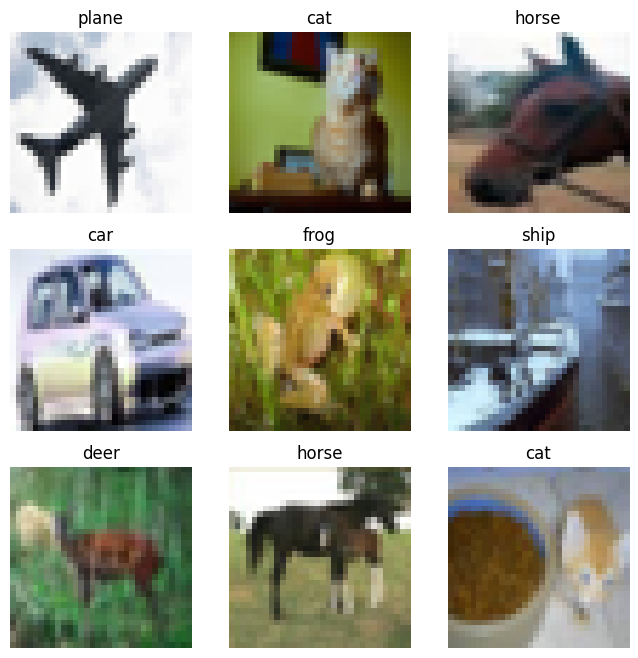

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    # Μετατροπή της εικόνας από Tensor σε Numpy array και αναδιάταξη των διαστάσεων
    img = img.numpy().transpose((1, 2, 0))
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img)
    plt.title(classes[label])
plt.show()

**Δημιουργία μοντέλου για την ταξινόμηση των δεδομένων της βάσςη CIFAR - 10 **

Μετα απο δοκιμές κατέληξα στο παρακάτω μοντέλο , μιας και το ερώτημα είναι προεραιτικό , δεν επικεντρώθηκα στην ανάλυση των διάφορων αρχιτεκτονικών που δοκίμασα , αλλά θα αναλύσω την τελική , και θα την χρησιμοποιήσω για να εξάγω συμπεράσματα σχετικά με την διαχωρισιμότητα των κλάσεων χρησιμοποιώντας μετρικές όπως η ακρίβεια, οι καμπύλες precision - recall και το το AUC (Area Under Curve) που
προκύπτει από τις καμπύλες .


Δημιουργόυμε ένα συνελικτικό νευρώνικό δίκτυο  .

In [ ]:

class CIFAR10NeuralNetwork(nn.Module):
      def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Πρώτο συνελικτικό επίπεδο
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),# Εφαρμογή της συνάρτησης ενεργοποίησης ReLU
            # Επίπεδο max pooling με παράθυρο 2x2 που μειώνει τη διάσταση της εικόνας κατά το ήμισυ
            nn.MaxPool2d(2, 2),  # Output: 32x16x16 (C x H x W)

            # Δεύτερο συνελικτικό επίπεδο
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output: 32x8x8

            nn.Flatten(),  # Output: 32*8*8 = 2048

            # Πρώτο πλήρως συνδεδεμένο επίπεδο
            nn.Linear(32*8*8, 128),
            nn.ReLU(),

            # Output layer για την ταξινόμηση σε 10 κλάσεις
            nn.Linear(128, 10),
            nn.Softmax(dim=1)  # softmax για εξαγωγή πιθανοτήτων
        )
      def forward(self, x):
          return self.network(x)

my_model_CIFAR10 = CIFAR10NeuralNetwork()

In [ ]:
#Αρχικοποίηση του learning rate
learning_rate = 1e-3

#Συνάρτηση απωλειών
loss_fn = nn.CrossEntropyLoss()  #multiclass classification

#Αλγόριθμος που θα ακολουθίσω στο training
optimizer = torch.optim.Adam(my_model_CIFAR10.parameters(), lr=learning_rate) #Αdam otpimizer

# Συνάρτηση για την εκπαίδευση του μοντέλου
#εάν θελω, τοποθετώ conditions για να σταματήσει , π.χ σταθερό validation_loss για x εποχές .

def train_loop(dataloader, my_model_CIFAR10, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):

        # Υπολογισμός της πρόβλεψης και της απώλειας
        pred = my_model_CIFAR10(X) #forward pass - τα data εκπαιδέυονται και παίρνουμε το output
        loss = loss_fn(pred, y) #loss ton predictions se sxesi me ta y

        # Backpropagation
        optimizer.zero_grad() #μηδενίζει το stack των gradients
        loss.backward() # Με βάση το loss ,κάνει backward με την αλυσίδα των gradients
        optimizer.step() #εδώ γίνεται το pdate των βαρών ,με βάση το learing rate του optimizer , τον αλγόριθμο που κάνει update και άλλες παραμέτρους

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# Συνάρτηση για την αξιολόγηση του μοντέλου
def test_loop(dataloader, my_model_CIFAR10, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad(): #Πάντα, γιατί δεν κάνω allocate buffers για το gradient , στο testing έχω μόνο forward
        for X, y in dataloader:
            pred = my_model_CIFAR10(X) #ola ta batches
            test_loss += loss_fn(pred, y).item() #forward pass
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #correect

    test_loss /= num_batches
    correct /= size
    accuracy_cifar10 = 100*correct
    print(f"Test Error: \n Accuracy: {(accuracy_cifar10):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return accuracy_cifar10

Εκπαίδευση και αξιολόγηση του μοντέλου

In [ ]:
# Αρχικοποίηση της λίστας για την αποθήκευση της ακρίβειας για κάθε εποχή
test_accuracies = []
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, my_model_CIFAR10, loss_fn, optimizer)
    accuracy_cifar10 = test_loop(test_dataloader, my_model_CIFAR10, loss_fn)
    test_accuracies.append(accuracy_cifar10)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301962  [    0/50000]
loss: 2.171890  [ 6400/50000]
loss: 2.067859  [12800/50000]
loss: 2.201627  [19200/50000]
loss: 2.047656  [25600/50000]
loss: 2.076091  [32000/50000]
loss: 2.137629  [38400/50000]
loss: 2.064391  [44800/50000]
Test Error: 
 Accuracy: 41.6%, Avg loss: 2.037802 

Epoch 2
-------------------------------
loss: 2.056733  [    0/50000]
loss: 2.024696  [ 6400/50000]
loss: 1.971180  [12800/50000]
loss: 2.134584  [19200/50000]
loss: 1.996893  [25600/50000]
loss: 2.016562  [32000/50000]
loss: 2.090111  [38400/50000]
loss: 2.031727  [44800/50000]
Test Error: 
 Accuracy: 49.9%, Avg loss: 1.961025 

Epoch 3
-------------------------------
loss: 1.933805  [    0/50000]
loss: 1.897875  [ 6400/50000]
loss: 1.847775  [12800/50000]
loss: 2.014988  [19200/50000]
loss: 1.925823  [25600/50000]
loss: 1.946260  [32000/50000]
loss: 1.992697  [38400/50000]
loss: 2.006957  [44800/50000]
Test Error: 
 Accuracy: 51.5%, Avg loss: 1.940727 

Epoc

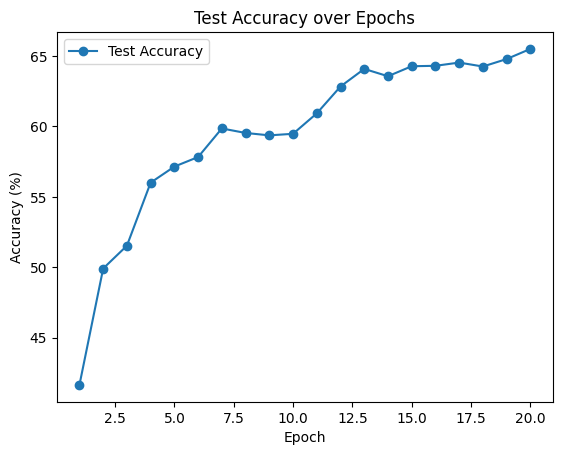

In [ ]:
# Δημιουργία του διαγράμματος των test accuracies για κάθε epoch
plt.plot(range(1, epochs+1), test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Οι μεταβλητές y_true και y_pred θα πρέπει να υπολογιστούν ως εξής:
y_true = torch.cat([y for x, y in test_dataloader], dim=0)
y_pred = torch.cat([my_model_CIFAR10(x) for x, y in test_dataloader], dim=0)
y_pred = y_pred.argmax(1)

#μετατροπή σε one - hot encoding
predicted_labels_one_hot = to_categorical(y_pred)
true_labels_one_hot = to_categorical(y_true)



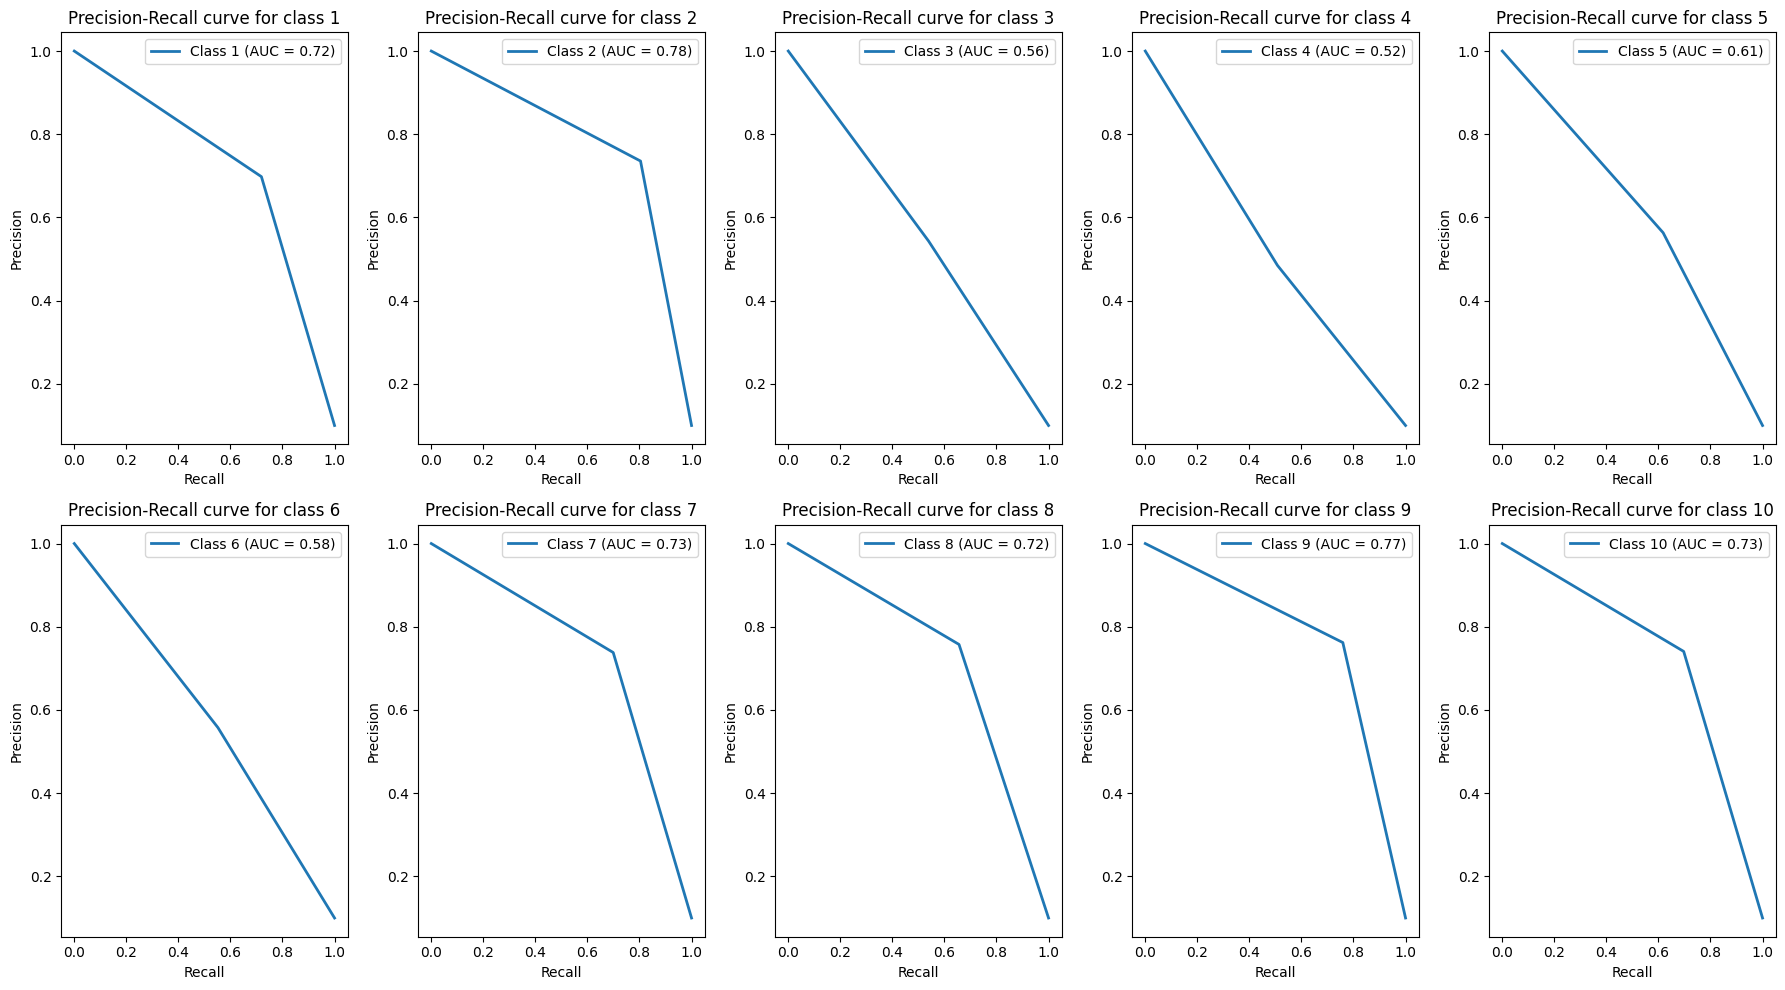

In [ ]:
# Υπολογισμός καμπυλών precision-recall και AUC για κάθε κλάση
num_classes = 10  # Αριθμός των κλάσεων
auc_val = []
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))

for i in range(num_classes):  # Επανάληψη για κάθε κλάση
    row = i // 5  # Υπολογισμός δείκτη σειράς
    col = i % 5   # Υπολογισμός δείκτη στήλης

    precision, recall, _ = precision_recall_curve(true_labels_one_hot[:, i], predicted_labels_one_hot[:, i])
    auc_val.append(auc(recall, precision))

    axs[row, col].plot(recall, precision, lw=2, label='Class {} (AUC = {:.2f})'.format(i+1, auc_val[i]))
    axs[row, col].set_xlabel('Recall')
    axs[row, col].set_ylabel('Precision')
    axs[row, col].set_title('Precision-Recall curve for class {}'.format(i + 1))
    axs[row, col].legend(loc="best")

plt.tight_layout()
plt.show()

**Παρατηρήσεις - Σχολιασμοί**

Αρχικά , γνωρίζουμε ότι μία κλάση είναι πλήρως διαχωρίσιμή όταν το AUC = 1. Δηλαδή , όταν η καμπύλη precision-recall έχει την  μορφή που είδαμε  και νωρίτερα (υψηλές τιμές και για το precision και για το recall σε όλο το φάσμα τιμών)


Στην  περίπτωση  του CIFAR - 10 , οι τιμές του AUC ποικίλουν , πράγμα που σημαίνει ότι το μοντέλο μπορεί να διακρίνει ευκολότερα κάποιες κλάσεις από κάποιες άλλες . Όσο μεγαλύτερη είναι η τιμή, τόσο το καλύτερο.


In [ ]:
# Ταξινόμηση των κλάσεων με βάση το AUC και εκτύπωση
sorted_classes_by_auc = sorted(range(num_classes), key=lambda i: auc_val[i], reverse=True)

print("Classes sorted by AUC:")
for rank, class_idx in enumerate(sorted_classes_by_auc):
    print(f"{rank+1} : Class {class_idx+1} with AUC = {auc_val[class_idx]:.2f}")

Classes sorted by AUC:
1 : Class 2 with AUC = 0.78
2 : Class 9 with AUC = 0.77
3 : Class 10 with AUC = 0.73
4 : Class 7 with AUC = 0.73
5 : Class 8 with AUC = 0.72
6 : Class 1 with AUC = 0.72
7 : Class 5 with AUC = 0.61
8 : Class 6 with AUC = 0.58
9 : Class 3 with AUC = 0.56
10 : Class 4 with AUC = 0.52


Σύμφωνα με την τιμή του AUC , οι πιο έυκολα διαχωρίσιμες κλάσεις είναι οι 2 και η 9 . Ακολουθούν οι 10 και η 7 . Το μοντέλο μπορεί να διαχωρίσει δυσκολότερα την κλάση 4 καθώς έχει την μικρότερη τιμή AUC ( 0.52 )  .  Τα παραπάνω αποτελέσματα μπορόυν να εκτιμηθούν και απο τα διαγράμματα , παρατηρούμε ότι η καμπύλη τις κλάσης 2 είναι αυτή που πλησιάζει περισσότερο το ιδανικό αποτέλεσμα που είδαμε παραπάνω( πιο κοντά στην άνω δεξιά γωνία του γραφήματος ) , ενώ αυτή της κλάσης 4 απέχει αρκετά από την ιδανική περίπτωση .

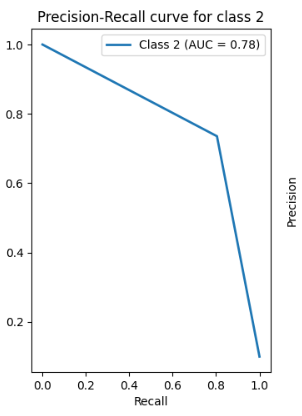



Η ιδανική καμπύλη :

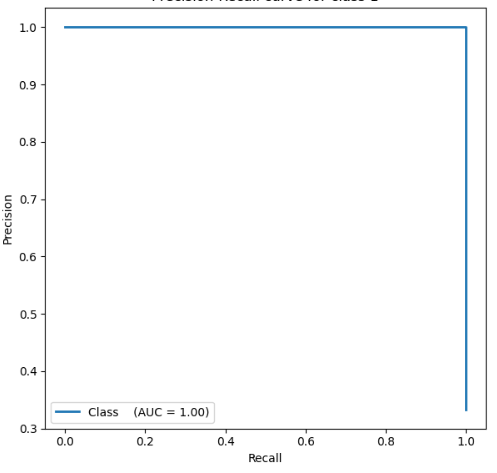


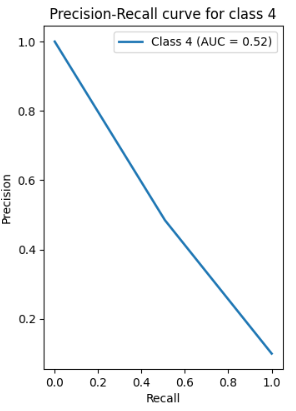

## **Άσκηση 2**

Ένα δίκτυο που χρησιμοποιεί auto encoders έχει την εξής μορφή :

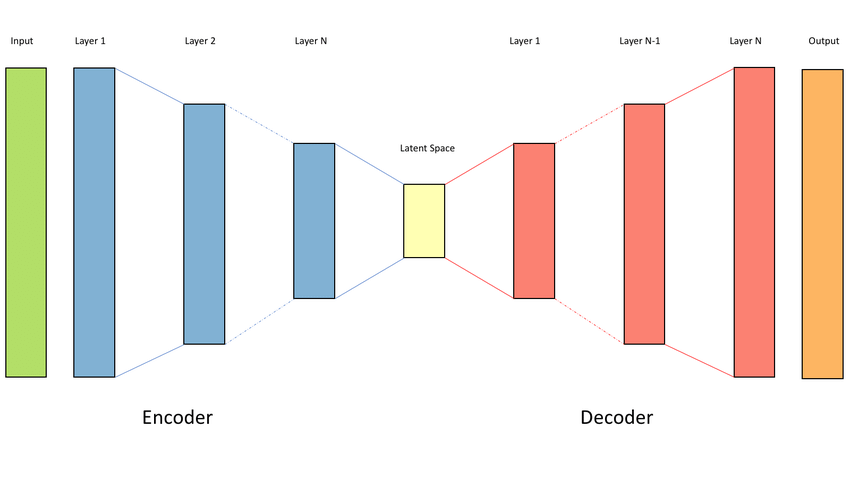

Ο **Encoder** αναλαμβάνει να μετατρέψει τα αρχικά δεδομένα σε μια συμπιεσμένη μορφη στο latent space . Στο τέλος του encoder, τα δεδομένα έχουν μετατραπεί σε μια μορφή που έχει λιγότερες διαστάσεις - λιγότερες πληροφορίες από τα αρχικά, αλλά επαρκείς για να περιγράψουν τα βασικά χαρακτηριστικά τους . Στόχος είναι τα συμπιεσμένα χαρακτηριστικά να μπορούν να ανακατασκευαστούν όσο το δυνατόν ευκολότερα με τον καλύτερο τρόπο . Όσο μικρότερες οι διαστάσεις στο latent space , τόσο μεγαλύτερη συμπίεση υπάρχει στα δεδομένα , και άρα τόσο λιγότερη λεπτομέρεια . Εάν ο χώρος επαρκεί , περιέχονται και μακροσοπικές πληροφορίες των εικόνων εισόδου , για παράδειγμα η γωνία λήψης κλπ.

Ο **Decoder** λαμβάνει τη συμπιεσμένη αναπαράσταση από τον encoder και προσπαθεί να ανακατασκευάσει τα αρχικά δεδομένα. Ξεκινά από τη μικρότερη διάσταση του "latent space" , και μέσω μιας αντίστροφης σειράς μετασχηματισμών παράγει την  εκτίμηση των αρχικών data.

Ο autoencoder εκπαιδεύεται με mean squared error (MSE) έτσι ώστε το output να είναι όσο το δυνατόν πιο κοντά στο αρχικό σε ένα unsupervised πρόβλημα .

## **Ερώτημα Α**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size=3):
        super(Autoencoder, self).__init__()
        # Encoder - Κωδικοποίηση της εισόδου σε χώρο 3 διαστάσεων
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, latent_size)
        )
        # Decoder - Ανακατασκευή της εικόνας
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 784  #  28px x 28px = 784
latent_size = 3 # Θα κάνουμε compress το παραπάνω σε 3 Διαστάσεις
batch_size = 64
learning_rate = 0.001
num_epochs = 20

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader_MNIST = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
# Load MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader_MNIST = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Initialize the autoencoder
model = Autoencoder(input_size, latent_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss() # MSE is the standard reconstruction-oriented loss - Στην πραγματικότητα έχω ένα πρόβλημα regression για την τιμή του κάθε pixel
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


100%|██████████| 9912422/9912422 [00:00<00:00, 138379979.25it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23425970.57it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47837666.16it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6781961.11it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Training the autoencoder
for epoch in range(num_epochs):
    for data in train_loader_MNIST:
        img, _ = data #den exw labels tora
        img = img.view(img.size(0), -1).to(device)

        # Forward pass
        output = model(img)

        # Compute the loss
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0434
Epoch [2/20], Loss: 0.0398
Epoch [3/20], Loss: 0.0396
Epoch [4/20], Loss: 0.0378
Epoch [5/20], Loss: 0.0383
Epoch [6/20], Loss: 0.0360
Epoch [7/20], Loss: 0.0399
Epoch [8/20], Loss: 0.0369
Epoch [9/20], Loss: 0.0392
Epoch [10/20], Loss: 0.0386
Epoch [11/20], Loss: 0.0348
Epoch [12/20], Loss: 0.0383
Epoch [13/20], Loss: 0.0349
Epoch [14/20], Loss: 0.0363
Epoch [15/20], Loss: 0.0321
Epoch [16/20], Loss: 0.0284
Epoch [17/20], Loss: 0.0327
Epoch [18/20], Loss: 0.0346
Epoch [19/20], Loss: 0.0312
Epoch [20/20], Loss: 0.0334


Τα αποτελέσματα του εργαστηρίου ήταν τα εξής:



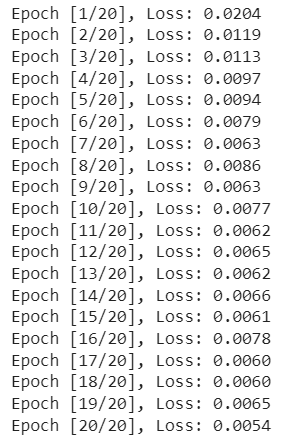


Όπως ήταν αναμενόμενο , παρατηρούμε ότι τα αποτελέσματα του εργαστηρίου είναι εμφανώς καλύτερα .  Παρόλο που στην παραπάνω υλοποίηση χρησιμοποιούμε ακόμα ένα layer το οποίο εισάγει νέα πληροφορία για τα χαρακτηριστικά και λεπτομέρια , καταλήγουμε να συμπιέζουμε τα χαρακτηριστικά σε έναν χώρο 3 διαστάσεων , που είναι πολυ μικρός σε σχέση με το input size . Έτσι δεν υπάρχουν τόσες διαστάσεις διαθέσιμες για να κωδικοποιήσουν τις πληροφορίες λεπτομεριακά .

Ωστόσο , και στις 2 περιπτώσει οι τιμές είναι μικρές , πράγμα που σημαίνει ότι ακόμα και στον χώρο 3 διαστάσεων υπάρχει ένα μεγάλο ποσοστο των πιο σημαντικών για την ανακατασκευή ιδιοτήτων και χαρακτηριστικών .

In [ ]:
import matplotlib.pyplot as plt
# Παρακάτω δοκιμάζουμε τον εκπαιδευμένο autoencoder

# Συνάρτηση για την εμφάνιση των αρχικών και ανακατασκευασμένων εικόνων
def plot_rec_img(data_loader, model):
    with torch.no_grad():  # Χωρίς υπολογισμό gradients
        for data in data_loader:
            img, labels = data
            img = img.view(img.size(0), -1).to(device)  # Μετατροπή της εικόνας σε 1D

            # Κωδικοποίηση των εικόνων
            encoded_imgs = model.encoder(img)
            # Ανακατασκευή των εικόνων
            rec_imgs = model.decoder(encoded_imgs)

            # Εμφάνιση των αρχικών και ανακατασκευασμένων εικόνων
            plt.figure(figsize=(5, 5))
            for i in range(3):
                # Αρχικές εικόνες
                plt.subplot(3, 3, i + 1)
                plt.imshow(img[i].cpu().numpy().reshape(28, 28), cmap='gray')
                plt.title('Αρχική')
                plt.axis('off')

                # Ανακατασκευασμένες εικόνες
                plt.subplot(3, 3, i + 4)
                plt.imshow(rec_imgs[i].cpu().numpy().reshape(28, 28), cmap='gray')
                plt.title('Ανακατασκευασμένη')
                plt.axis('off')

            plt.show()
            break  # Διακοπή μετά το πρώτο batch

            # Ο autoencoder συμπιέζει την χρήσιμη πληροφορία σε έναν χώρο με πολύ λιγότερες διαστάσεις.
            # Είναι σαν ένα "bottleneck" που επιτρέπει τον εστιασμό σε μακροσκοπικούς παράγοντες
            # που επηρεάζουν το πρόβλημα, όπως γωνία λήψης, ηλικία, πώς ήταν τοποθετημένο το χέρι κ.λπ.


-----------------TRAINING SAMPLES-----------------



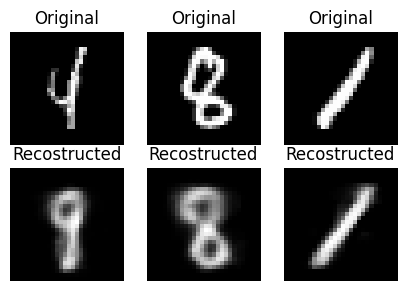

------------------TEST SAMPLES-----------------



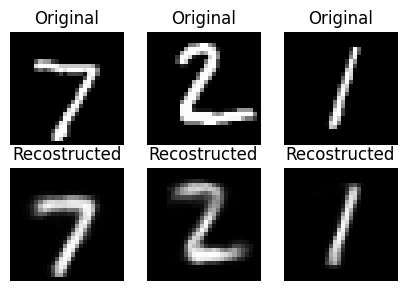

In [ ]:
print("-----------------TRAINING SAMPLES-----------------\n")

plot_rec_img(train_loader_MNIST , model)

print("------------------TEST SAMPLES-----------------\n")
plot_rec_img(test_loader_MNIST , model)

Παραπάνω βλέπουμε τις αρχικές εικόνες και την ανακατασκευή τους. Από αυτό που βλέπουμε, ο autoencoder φαίνεται να ανακατασκευάζει τους αριθμούς με αρκετά καλή ακρίβεια, διατηρώντας το γενικό σχήμα και τις δομές των αρχικών αριθμών.

Οι ανακατασκευασμένες εικόνες εμφανίζουν μια κάποια απώλεια λεπτομέρειας σε σύγκριση με τις αρχικές, κάτι που είναι αναμενόμενο λόγω της διαδικασίας συμπίεσης που εφαρμόζει ο encoder. Ωστόσο, η βασική μορφή και δομή των αριθμών διατηρείται, πράγμα που δείχνει ότι οι κρίσιμες πληροφορίες για την αναγνώριση των αριθμών έχουν πράγματι ενσωματωθεί στον latent space και έχουν χρησιμοποιηθεί  από τον decoder.

## **Ερώτημα Β**

-----------------TRAINING SAMPLES-----------------



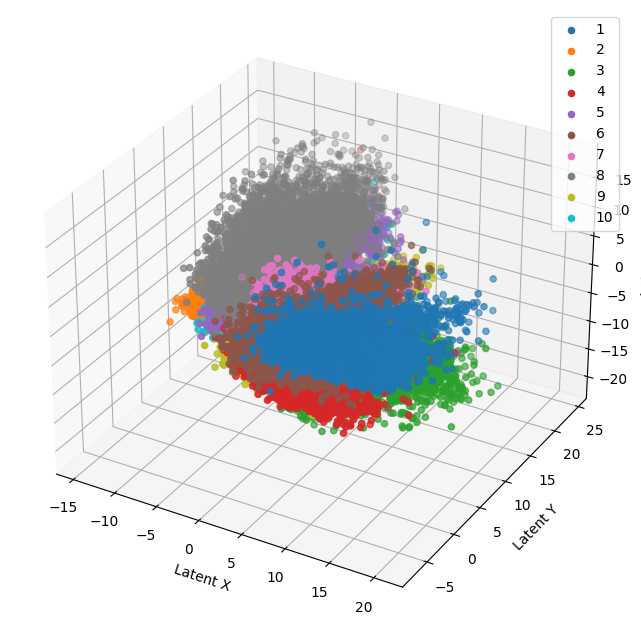

--------------------TEST SAMPLES--------------------



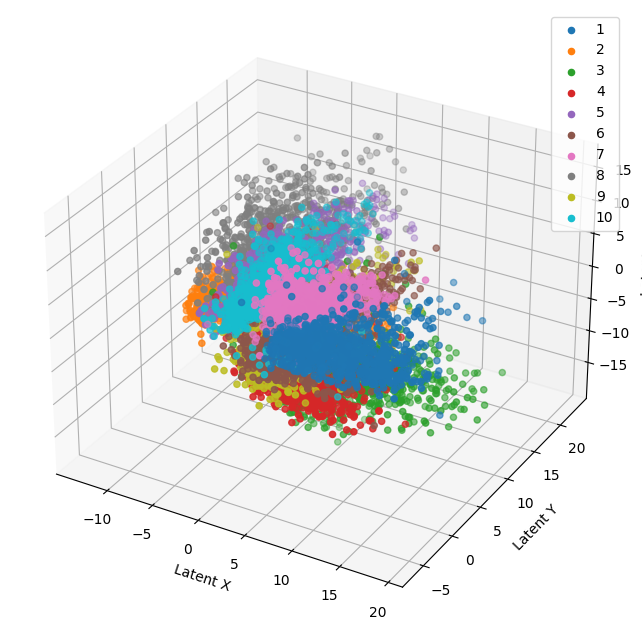

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_latent_space(data_loader, model,num_classes=10):
    # 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Συλλογή των encoded points και των αντίστοιχων labels
    all_encoded_imgs = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(images.size(0), -1).to(device)
            encoded_imgs = model.encoder(images).cpu().numpy()
            all_encoded_imgs.append(encoded_imgs)
            all_labels.append(labels.numpy())

    # Συνδυασμός των λιστών encoded_imgs kai labels σε έναν numpy πίνακα
    all_encoded_imgs = np.concatenate(all_encoded_imgs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Οπτικοποίηση των encoded points
    for i in range(num_classes):
        idx = all_labels == i
        ax.scatter(all_encoded_imgs[idx, 0], all_encoded_imgs[idx, 1], all_encoded_imgs[idx, 2],  label=str(i+1))

    ax.set_xlabel('Latent X')
    ax.set_ylabel('Latent Y')
    ax.set_zlabel('Latent Z')
    ax.legend()
    plt.show()
    return all_encoded_imgs


print("-----------------TRAINING SAMPLES-----------------\n")

# Οπτικοποίηση του latent space για το training set
train_encoded_imgs = visualize_latent_space(train_loader_MNIST, model)

print("--------------------TEST SAMPLES--------------------\n")

# Οπτικοποίηση του latent space για το test set
test_encoded_imgs = visualize_latent_space(test_loader_MNIST, model)


**Σχόλια  - Παρατηρήσεις**

Και στις δύο εικόνες, οι κλάσεις φαίνονται να είναι διασκορπισμένες σε όλο τον χώρο, με κάποιες εκ των κλάσεων να εμφανίζουν καλύτερη διακριτική δυνατότητα από άλλες, όπως φαίνεται από τις πιο συγκεντρωμένες ομάδες σημείων .  Επιπλέον , παρατηρείται μια επικάλυψη τω κλάσεων , κυρίως στην κεντρική περιοχή του χώρου , πράγμα που σημάινει ότι το μοντέλο μπορει να έχει δυσκολία στο να τις διαχωρίσει καθώς αυτές αποτελούνται από παρόμοια χαρακτηριστικά .

**Σύγκριση των διαγραμμάτων**

Οι δομές - θέσεις των κλάσεων στον χώρο φαίνεται να είναι σχετικά συνεπείς στις 2 περιπτώσεις , και αυτό υποδηλώνει ότι ο autoencoder έχει μάθει αναπαραστάσεις που πετυχαίνουν καλή γενίκευση από τα δεδομένα εκπαίδευσης στα δεδομένα δοκιμής .

## **Ερώτημα Γ**

Σε αυτό το ερώτημα θα χρησιμοποιήσουμε τον κλάδο αποκωδικοποίησης του εκπαιδευμένου autoencoder ώστε να
δημιουργήσουμε εικόνες ξεκινώντας από τυχαία σημεία του latent space

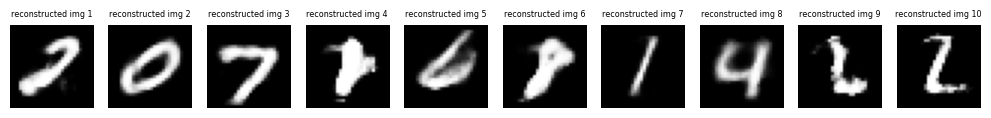

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
# Υπολογίζουμε το εύρος τιμών για κάθε διάσταση
latent_mins = train_encoded_imgs.min(axis=0)
latent_maxs = train_encoded_imgs.max(axis=0)

# Ορίστε τον αριθμό των δειγμάτων και το μέγεθος του latent space
num_samples = 10
latent_size = 3

# ημιουργία τυχαίων δειγμάτων
# Θα χρησιμοποιήσουμε το πεδίο τιμών του lantent space και θα δημιουργήσουμε δείγματα  μέσα σε αυτό
random_latent_vectors = torch.rand(num_samples, latent_size)
random_latent_vectors = random_latent_vectors * (latent_maxs - latent_mins) + latent_mins

random_latent_vectors = random_latent_vectors.to(device)

# Δημιουργία νέων εικόνων από τα τυχάια δείγματα χρησιμοποιώντας τον decoder
with torch.no_grad():
    new_images = model.decoder(random_latent_vectors).cpu()
# Απεικονίστε τις νέες εικόνες

plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(new_images[i].view(28, 28), cmap='gray')
    plt.title(f"reconstructed img {i+1}",fontsize= 'xx-small')
    plt.axis('off')
    plt.tight_layout()
plt.show()


**Σχόλια - Παρατηρήσεις**

Από τις παραπάνω εικόνες παρατηρούμε ότι ορισμένες περιοχές  , αντιστοιχούν σε ψηφία στο latent space , ενώ άλλες όχι . Με βάση την προηγούμενη οπτικοποίηση του latent space , διακρίναμε ότι υπήρχε επικάλυψη μεταξύ των κλάσεων - ψηφίων , και έτσι σημεία που βρίσκονται μεταξύ αυτών των περιοχών είναι  δυσκολότερα διαχωρίσιμα καθώς μπορεί να αναπαραστουν ενδιάμεσες μορφές των ψηφίων με αποτέλεσμα να δημιουργόυνται πιο ασαφή σχήματα . Επιπλέον ,κάποια σημεία του latent space μπορεί να αντιπροσωπεύουν θόρυβο που προκύπτει κατά την εκπαίδευση .

## **Άσκηση 3**

## **Ερώτημα A**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
import seaborn as sns

# Φόρτωση του συνόλου δεδομένων Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

# Χωρισμός του συνόλου δεδομένων σε 70% εκπαίδευση και 30% δοκιμή
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## **Ερώτημα B**

In [ ]:
# Make sure to upgrade to sklearn v 1.3.2
# don forget to restart the runtime if asked
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.6 MB/s eta 0:00:00


In [ ]:

np.random.seed(42)

# Συνάρτηση για την προσομοίωση missing values στο σετ εκπαίδευσης
def introduce_missing_values(X, percentage):
    missing_mask = np.random.rand(*X.shape) < percentage
    X_missing = X.copy()
    X_missing[missing_mask] = np.nan
    return X_missing

# Εφαρμογή missing values σε ποσοστό 10% στο σύνολο δεδομένων εκπαίδευσης
missing_percentage = 0.1
X_train_missing = introduce_missing_values(X_train, missing_percentage)

# Δημιουργία και εκπαίδευση ενός δενδρικού ταξινομητή
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_missing, y_train)

# Πρόβλεψη με χρήση του σετ δοκιμής και υπολογισμός της ακρίβειας
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


print(f"Train with {missing_percentage*100:.1f}% missing values. Accuracy of Decision Tree Classifier : {accuracy_dt*100:.1f}%")


Train with 10.0% missing values. Accuracy of Decision Tree Classifier : 91.2%


## **Ερώτημα Γ**

Για να υλοποιήσουμε έναν Random Forest ταξινομητή χειροκίνητα με τη χρήση απλών δενδρικών ταξινομητών, θα πρέπει να ακολουθήσουμε τα εξής βήματα:




*   Δημιουργία και Εκπαίδευση Μεμονωμένων Δενδρικών Ταξινομητών: Θα δημιουργήσουμε 100 δενδρικούς ταξινομητές, όπου κάθε ένας θα εκπαιδευτεί σε ένα υποσύνολο των χαρακτηριστικών των δεδομένων εκπαίδευσης. Τα missing values θα αγνοηθούν κατά την εκπαίδευση.

*   Πρόβλεψη για κάθε Δέντρο: Για το σετ δοκιμής, κάθε δέντρο κάνει προβλέψεις μόνο με βάση τα χαρακτηριστικά στα οποία εκπαιδεύτηκε.

*   Υπολογισμός Τελικής Πρόβλεψης: Καταγράφονται οι προβλέψεις όλων των δένδρων και υπολογίζει τη κανονικοποιημένη μέση τιμή των προβλέψεων για κάθε δείγμα . Το δείγμα ανατίθεται στην κλάση που προκύπτει .  Γενικά στην χρήση του majority voting , στο δείγμα αποδίεται η κλάση που έχει προβλέψει η πλειοψηφία των δενδρικών ταξινομητών μέσα σε ένα random forest .


*   Υπολογισμός της Ακρίβειας στο Test Set: Θα υπολογίσουμε την ακρίβεια του χειροκίνητα εκπαιδευμένου Random Forest στο σετ δοκιμής.








In [ ]:
def random_forest_classifier(percentage ,X_train_missing , X_test):
    np.random.seed(0)

    # Αριθμός δένδρων στο Random Forest
    n_estimators = 100

    # Μέγιστος αριθμός χαρακτηριστικών για κάθε δέντρο
    max_features = 5

    # Δημιουργία μιας λίστας για να αποθηκεύσουμε τα δέντρα του Random Forest
    rf_trees = []

    for i in range(n_estimators):
      # Δημιουργία ενός νέου δενδρικού ταξινομητή
      tree = DecisionTreeClassifier(max_depth=3, random_state=42)

      # Επιλογή τυχαίων χαρακτηριστικών
      features = np.random.choice(X_train_missing.shape[1], max_features, replace=False)

      # Φιλτράρισμα του συνόλου εκπαίδευσης με missing values για να περιέχει μόνο τα επιλεγμένα χαρακτηριστικά
      X_train_filtered = X_train_missing[:, features]

      # Εκπαίδευση του δένδρου στο φιλτραρισμένο σύνολο δεδομένων
      tree.fit(X_train_filtered, y_train)

      # Αποθήκευση του δένδρου και των επιλεγμένων χαρακτηριστικών
      rf_trees.append((tree, features))

    # Πρόβλεψη για το σετ δοκιμής με χρήση majority voting
    predictions = np.zeros((X_test.shape[0], len(rf_trees)))
    for i, (tree, features) in enumerate(rf_trees):
      predictions[:, i] = tree.predict(X_test[:, features])


    # Υπολογισμός της τελικής πρόβλεψης
    final_prediction = np.round(predictions.mean(axis=1))

    # Υπολογισμός της ακρίβειας του χειροκίνητου Random Forest
    accuracy_manual_rf = accuracy_score(y_test, final_prediction)

    print(f"Train with {percentage*100:.1f}% missing values. Accuracy of Random Forest : {accuracy_manual_rf*100:.1f}%")
    return accuracy_manual_rf , rf_trees

In [ ]:
_ , rf_trees = random_forest_classifier(missing_percentage,X_train_missing , X_test)

Train with 10.0% missing values. Accuracy of Random Forest : 96.5%


Χρησιμοποιώντας έναν random forest ταξινομητή πετυχαίνουμε μεγαλύτερη ακρίβεια . Αυτό συμβαίνει διότι σε αντίθεση με πριν , τώρα έχουμε 100 δενδρικούς ταξινομητές που εκπαιδεύονται στα δεδομένα και συμβάλλουν όλοι μαζί στην λήψη αποφάσεων . Έτσι , μπορούν και εξάγονται πληροφορίες με περισσότερη λεπτομέρεια για τα χαρακτηριστικά  , και το μοντέλο ενισχύεται και πετυχαίνει καλύτερη  και πιο ακριβής ταξινόμηση .

## **Ερώτημα Δ**

### Υπολογισμός του feature importance για τον δενδρικό ταξινομητή

In [ ]:
# Υπολογισμός του feature importance για τον δενδρικό ταξινομητή
importances_dt = dt_classifier.feature_importances_

# Εμφάνιση των αποτελεσμάτων για το feature importance
print("Decision Tree Feature Importances:")
for feature, importance in zip(data.feature_names, importances_dt):
    print(f"{feature}: {importance:.4f}")


Decision Tree Feature Importances:
mean radius: 0.0000
mean texture: 0.0246
mean perimeter: 0.0000
mean area: 0.0035
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.0000
mean symmetry: 0.0000
mean fractal dimension: 0.0000
radius error: 0.0000
texture error: 0.0027
perimeter error: 0.0000
area error: 0.0193
smoothness error: 0.0000
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0000
symmetry error: 0.0000
fractal dimension error: 0.0000
worst radius: 0.2130
worst texture: 0.0428
worst perimeter: 0.0000
worst area: 0.0316
worst smoothness: 0.0000
worst compactness: 0.0000
worst concavity: 0.0109
worst concave points: 0.6516
worst symmetry: 0.0000
worst fractal dimension: 0.0000



Παρακάτω θα παρουσιάσουμε τα feature importances που είναι διαφορετικά του μηδενός και ταξινομημένα, απο αυτό με την μεγαλύτερη τιμή προς αυτό με την μικρότερη ( μικρότερη συνεισφορά )







In [ ]:
# Εύρεση και εμφάνιση των μη μηδενικών feature importances, ταξινομημένα από το μεγαλύτερο προς το μικρότερο
non_zero_importances_dt = {feature: importance for feature, importance in zip(data.feature_names, importances_dt) if importance > 0}
sorted_non_zero_importances_dt = sorted(non_zero_importances_dt.items(), key=lambda x: x[1], reverse=True)

print("Sorted Non-zero Decision Tree Feature Importances:")
for feature, importance in sorted_non_zero_importances_dt:
    print(f"{feature}: {importance:.4f}")

Sorted Non-zero Decision Tree Feature Importances:
worst concave points: 0.6516
worst radius: 0.2130
worst texture: 0.0428
worst area: 0.0316
mean texture: 0.0246
area error: 0.0193
worst concavity: 0.0109
mean area: 0.0035
texture error: 0.0027


Αναλύοντας τις τιμές των feature importances για τον δενδρικό ταξινομητή (Decision Tree) , μπορούμε να κατανοήσουμε ποια χαρακτηριστικά είναι πιο σημαντικά στη λήψη αποφάσεων του μοντέλου:

Oι υψηλότερες τιμές δείχνουν τα χαρακτηριστικά που έχουν τη μεγαλύτερη συνεισφορά στις προβλέψεις του δενδρικού ταξινομητή. Το χαρακτηριστικό **'worst concave points'** έχει την υψηλότερη σημασία, ακολουθούμενο από το **'worst radius'**. Αυτό υποδεικνύει ότι αυτά τα χαρακτηριστικά είναι πολύ σημαντικά για το μοντέλο κατά τη λήψη αποφάσεων σχετικά με τις προβλέψεις. ​​

Παρατηρούμε επιπλέον ότι πολλά χαρακτηριστικά έχουν μηδενική ή πολύ χαμηλή σημασία στο μοντέλο. Αυτό υποδεικνύει ότι αυτά τα χαρακτηριστικά είτε δεν συμβάλλουν στις προβλέψεις είτε η συνεισφορά τους είναι περιορισμένη.


Η συνολική εικόνα από αυτές τις τιμές είναι ότι το μοντέλο βασίζεται κυρίως σε λίγα συγκεκριμένα χαρακτηριστικά για να κάνει τις προβλέψεις του, με τα 'worst concave points' και 'worst radius' να ξεχωρίζουν ως τα πιο σημαντικά.







### Υπολογισμός του feature importance για το Random Forest

In [ ]:
# Αρχικοποίηση πίνακα για τη συλλογή των feature importances
total_importances = np.zeros(X_train_missing.shape[1])
feature_counts = np.zeros(X_train_missing.shape[1])

# Συλλογή των feature importances από κάθε δένδρο
for tree, features in rf_trees:

    total_importances[features] += tree.feature_importances_
    feature_counts[features] += 1

# Υπολογισμός του μέσου όρου των feature importances
average_importances_rf = total_importances / feature_counts

# Αντικατάσταση των τιμών nan με 0
average_importances_rf = np.nan_to_num(average_importances_rf)


# Εμφάνιση των αποτελεσμάτων για το feature importance του Random Forest
print("Random Forest Feature Importances:")
for feature, importance in zip(data.feature_names, average_importances_rf):
    print(f"{feature}: {importance:.4f}")



Random Forest Feature Importances:
mean radius: 0.2573
mean texture: 0.0590
mean perimeter: 0.3152
mean area: 0.2563
mean smoothness: 0.0441
mean compactness: 0.1126
mean concavity: 0.0000
mean concave points: 0.3912
mean symmetry: 0.0102
mean fractal dimension: 0.0340
radius error: 0.1551
texture error: 0.0132
perimeter error: 0.1155
area error: 0.1960
smoothness error: 0.0254
compactness error: 0.0239
concavity error: 0.0770
concave points error: 0.0793
symmetry error: 0.0126
fractal dimension error: 0.0267
worst radius: 0.0000
worst texture: 0.0000
worst perimeter: 0.6720
worst area: 0.0000
worst smoothness: 0.1121
worst compactness: 0.0729
worst concavity: 0.1387
worst concave points: 0.7758
worst symmetry: 0.0715
worst fractal dimension: 0.0085


In [ ]:
# Εύρεση και εμφάνιση των μη μηδενικών feature importances για το Random Forest, ταξινομημένες από το μεγαλύτερο προς το μικρότερο
non_zero_importances_rf = {feature: importance for feature, importance in zip(data.feature_names, average_importances_rf) if importance > 0}
sorted_non_zero_importances_rf = sorted(non_zero_importances_rf.items(), key=lambda x: x[1], reverse=True)

print("Sorted Non-zero Random Forest Feature Importances:")
for feature, importance in sorted_non_zero_importances_rf:
    print(f"{feature}: {importance:.4f}")


Sorted Non-zero Random Forest Feature Importances:
worst concave points: 0.7758
worst perimeter: 0.6720
mean concave points: 0.3912
mean perimeter: 0.3152
mean radius: 0.2573
mean area: 0.2563
area error: 0.1960
radius error: 0.1551
worst concavity: 0.1387
perimeter error: 0.1155
mean compactness: 0.1126
worst smoothness: 0.1121
concave points error: 0.0793
concavity error: 0.0770
worst compactness: 0.0729
worst symmetry: 0.0715
mean texture: 0.0590
mean smoothness: 0.0441
mean fractal dimension: 0.0340
fractal dimension error: 0.0267
smoothness error: 0.0254
compactness error: 0.0239
texture error: 0.0132
symmetry error: 0.0126
mean symmetry: 0.0102
worst fractal dimension: 0.0085


Αρχικά , παρατηρούμε ότι ο Random Forest , έχει μη μηδενικές τιμές για τα περισσότερα χαραακτηριστικά . Αυτό είναι λογικό καθώς χρησιμοποιεί 100 διαφορετικούς δενδρικούς ταξινομητές που εστιάζουν καθε φορά σε 5 τυχαία χαρακτηριστικά ο κάθε ένας.

Βλέπουμε ότι την μεγαλύτερη σημασιολογία στην λήψη αποφάσεων την έχει το χαρακτηριστικό **worst concave points** ακολουθεί το **worst perimeter** ,  και πάει λέγοντας.

Συνολικά, τα αποτελέσματα αυτά δείχνουν τη σημαντική συνεισφορά μιας ποικιλίας χαρακτηριστικών στις προβλέψεις του Random Forest, με εμφαση σε χαρακτηριστικά που αφορούν τη μορφολογία και το μέγεθος των όγκων.

**Συμπεράσματα**


Από την ανάλυση του feature importance για τους δύο ταξινομητές, παρατηρούμε ότι υπάρχουν κάποιες διαφορές στο πόσο σημαντικά θεωρείται κάθε χαρακτηριστικό από τον κάθε ταξινομητή. Το πιο σημαντικό χαρακτηριστκό και για τους δύο είναι το **worst concave points** , ωστόσο απο εκεί και μετά υπάρχουν αρκετές διαφορές στην σημαντικότητα των χαρακτηριστικών .

Αυτές οι διαφορές  οφείλονται στη διαφορετική φύση των δύο μοντέλων. Ο Random Forest έχει μία πιο ισορροπημένη κατανομή,καθώς συνδυάζοντας τις προβλέψεις πολλών δέντρων  φαίνεται να εκμεταλλεύεται καλύτερα την πληροφορία που προσφέρεται από τα διάφορα χαρακτηριστικά, επιτρέποντας μια πιο ολοκληρωμένη ανάλυση.Ο δενδρικός ταξινομητής παρουσιάζει μία πιο περιορισμένη προσέγγιση καθώς φαίνεται να βασίζεται περισσότερο σε επιμέρους χαρακτηριστικά για την λήψη των αποφάσεών του.

Ο ταξινομητής RF παρουσιάζει υψηλότερη ακρίβειασυγκριτικά με τον δενδρικό ταξινομητή, κάτι που είναι αναμενόμενο λόγω της φύσης του μοντέλου που συνδυάζει τις προβλέψεις από πολλά δένδρα, μειώνοντας την πιθανότητα υπερ-εκπαίδευσης και αυξάνοντας τη γενίκευση.


## **Ερώτημα Ε**

Missing Percentage in Training Samples: 0%
Train with 0.0% missing values. Accuracy of Random Forest : 96.5%
Train with 10.0% missing values. Accuracy of Random Forest : 95.9%
Train with 20.0% missing values. Accuracy of Random Forest : 95.3%
Train with 30.0% missing values. Accuracy of Random Forest : 95.3%
Train with 40.0% missing values. Accuracy of Random Forest : 92.4%
Train with 50.0% missing values. Accuracy of Random Forest : 88.3%
Train with 60.0% missing values. Accuracy of Random Forest : 81.9%
Train with 70.0% missing values. Accuracy of Random Forest : 71.3%
Train with 80.0% missing values. Accuracy of Random Forest : 64.9%
Missing Percentage in Training Samples: 10%
Train with 0.0% missing values. Accuracy of Random Forest : 95.9%
Train with 10.0% missing values. Accuracy of Random Forest : 96.5%
Train with 20.0% missing values. Accuracy of Random Forest : 95.9%
Train with 30.0% missing values. Accuracy of Random Forest : 94.7%
Train with 40.0% missing values. Accuracy of

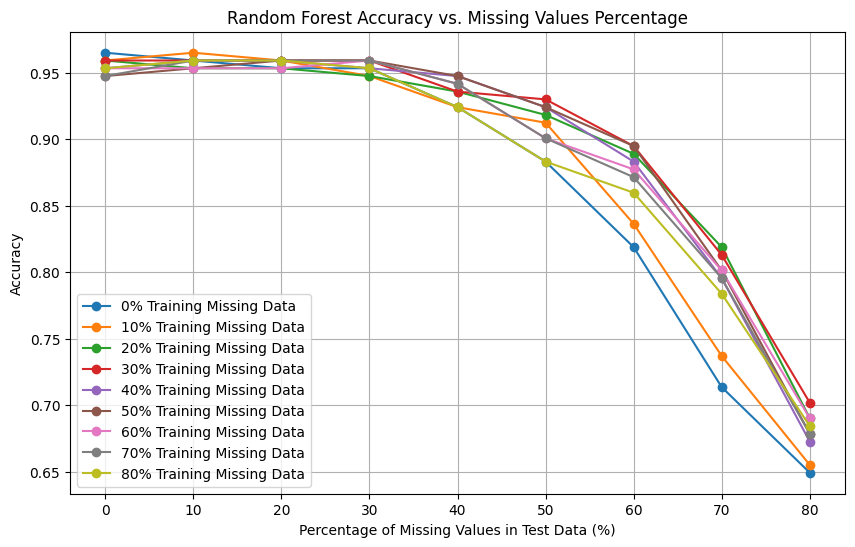

In [ ]:
# Δημιουργία λίστας για αποθήκευση των ακριβειών για κάθε ποσοστό missing values
total_accuracies = []

# Επανάληψη για διάφορα ποσοστά missing values στο training set
for missing_percentage_train in range(0, 81, 10):
    # Δημιουργία missing values στο training set
    X_train_missing = introduce_missing_values(X_train, missing_percentage_train / 100)
    print(f"Missing Percentage in Training Samples: {missing_percentage_train}%")

    accuracies = []
    # Επανάληψη για διάφορα ποσοστά missing values στο test set
    for missing_percentage_test in range(0, 81, 10):
        X_test_missing = introduce_missing_values(X_test, missing_percentage_test / 100)
        accuracy, _ = random_forest_classifier(missing_percentage_test / 100, X_train_missing, X_test_missing)
        accuracies.append(accuracy)

    total_accuracies.append(accuracies)


plt.figure(figsize=(10, 6))
for i, accuracies in enumerate(total_accuracies):
    plt.plot(range(0, 81, 10), accuracies, marker='o', label=f'{i * 10}% Training Missing Data')
plt.title('Random Forest Accuracy vs. Missing Values Percentage')
plt.xlabel('Percentage of Missing Values in Test Data (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Συμπεράσματα**

Αναφορικά με τα ποσοστά των missing values που αναφέρονται στο training set , παρατηρούμε ότι το μοντέλο έχει σχετικά παρόμοι ασυμπεριφορά , χωρίς να υπάρχουν μεγάλες διαφορές στις καμπύλες τις κάθε περίπτωσης .  Απο την άλλη όμως ,σ όλες τις περιπτώσεις , το accuracy παραμένει σχετικά υψηλό και σταθερό όσο έχουμε λιγότερο από 40% missing data στο σετ δοκιμής , αλλά στην συνέχεια παρατηρούμε απότομη μείωση , με την τιμή της ακρίβειας να πέφτει γύρω στο 65-70 % όταν έχουμε ποσοστό missing data στο test set μεγαλύτερο του 70%

Σύμφωνα με το διάγραμμα, ο ταξινομητής φαίνεται να είναι πιο ευαίσθητος στα missing data στο σύνολο δοκιμής παρά στο σύνολο εκπαίδευσης. Αυτό μπορεί να οφείλεται στο ότι, κατά την εκπαίδευση, ο ταξινομητής μπορεί να αναγνωρίσει και να αντιμετωπίσει τα patterns των δεδομένων που απουσιάζουν, αλλά κατά τη δοκιμή,
η αναγνώριση των patterns από τα missing data μπορεί να μην είναι δυνατή αν τα δεδομένα που λείπουν είναι πολύ διαφορετικά από αυτά που είδε κατά την εκπαίδευση. Αυτό μπορεί να οδηγήσει σε υψηλότερη αβεβαιότητα και χαμηλότερη ακρίβεια.



Επομένως, τα αποτελέσματα δείχνουν ότι ο ταξινομητής Random Forest είναι σχετικά ανθεκτικός στα missing data στο σύνολο εκπαίδευσης, αλλά η ακρίβεια του επηρεάζεται σημαντικά από τα missing data στο σύνολο δοκιμής.




## **Ερώτημα ΣΤ**

Train with 10.0% missing values. Accuracy of Random Forest : 95.9%


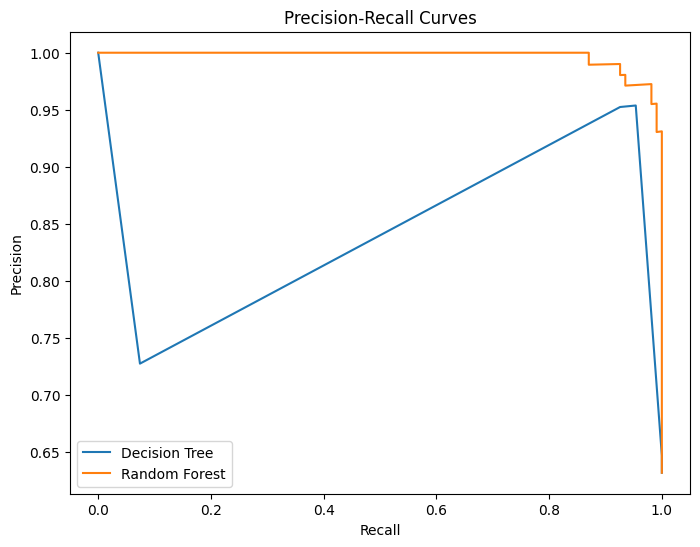

In [ ]:
# Εφαρμογή missing values σε ποσοστό 10% στο σύνολο δεδομένων εκπαίδευσης
missing_percentage = 0.1
X_train_missing = introduce_missing_values(X_train, missing_percentage)

# Δημιουργία και εκπαίδευση ενός δενδρικού ταξινομητή
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_missing, y_train)

# Πρόβλεψη με χρήση του σετ δοκιμής και υπολογισμός της ακρίβειας
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# Υπολογισμός των πιθανοτήτων πρόβλεψης για την κλάση 1 για το δενδρικό ταξινομητή
prob_dt = dt_classifier.predict_proba(X_test)[:, 1]

# Υπολογισμός των καμπυλών precision-recall για τον δενδρικό ταξινομητή
precision_dt, recall_dt, _ = precision_recall_curve(y_test, prob_dt)
# Επανάληψη της διαδικασίας για τον RF ταξινομητή
accuracy_manual_rf, rf_trees = random_forest_classifier(missing_percentage, X_train_missing, X_test)

# Υπολογισμός των πιθανοτήτων πρόβλεψης για την κλάση 1 για τον RF ταξινομητή
prob_rf = np.zeros(len(X_test))
for tree, features in rf_trees:
    prob_rf += tree.predict_proba(X_test[:, features])[:, 1]
prob_rf /= len(rf_trees)

# Υπολογισμός των καμπυλών precision-recall για τον RF ταξινομητή
precision_rf, recall_rf, _ = precision_recall_curve(y_test, prob_rf)

# Εμφάνιση των καμπυλών precision-recall
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()



**Σχόλια - Παρατηρήσεις**


Από το διάγραμμα, φαίνεται ότι η καμπύλη του RF βρίσκεται πιο πάνω και πιο δεξιά συγκριτικά με εκείνη του δενδρικού ταξινομητή, δείχνοντας υψηλότερα precision και recall σε όλα τα επίπεδα. Αυτό σημαίνει ότι ο RF ταξινομητής είναι ικανός να προβλέψει την κλάση της κακοήθειας με μεγαλύτερη ακρίβεια και έχει λιγότερα ψευδώς αρνητικά αποτελέσματα συγκριτικά με τον δενδρικό ταξινομητή.

Παράδειγμα Αποτελεσμάτων για κατανόηση:

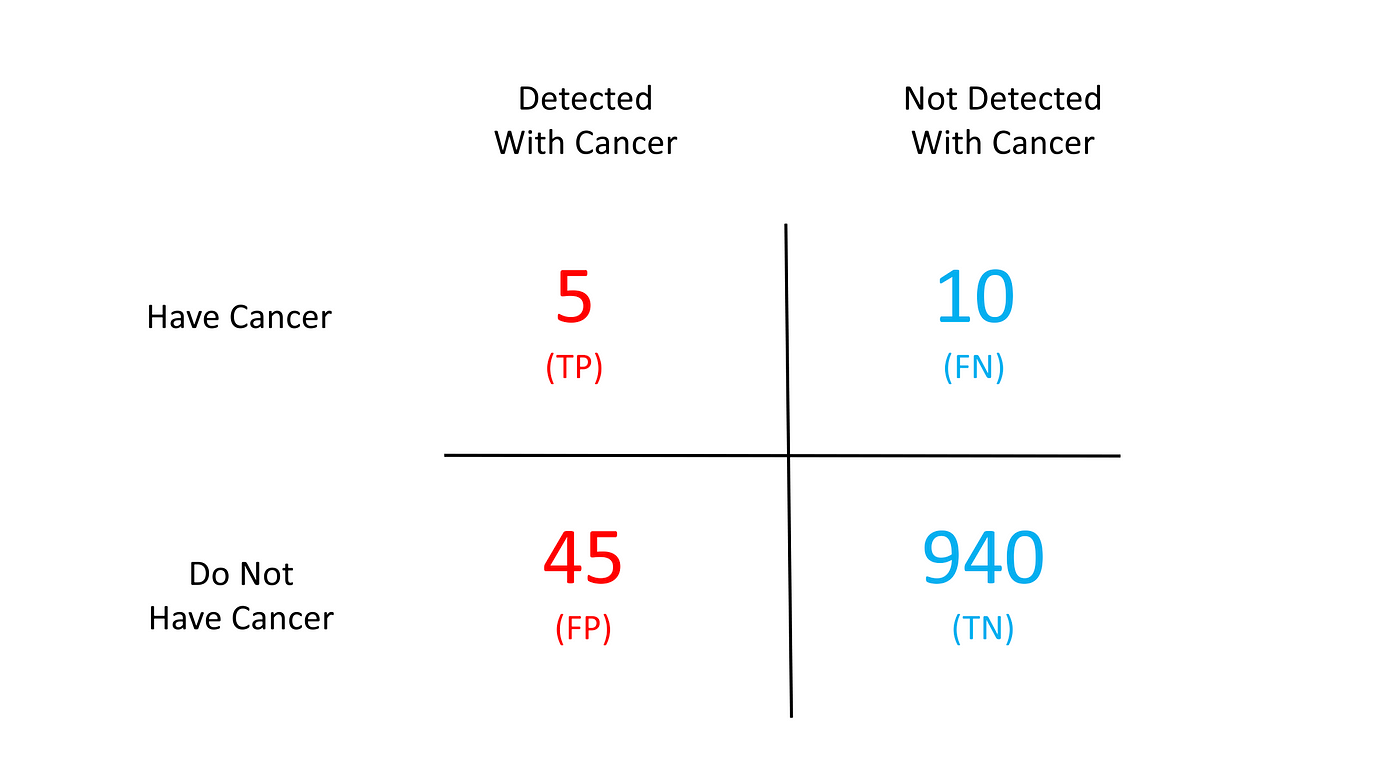



Στην πρακτική εφαρμογή για την πρόβλεψη κακοήθων όγκων, το σημαντικότερο χαρακτηριστικό της καμπύλης είναι το precision σε υψηλά επίπεδα recall. Αυτό είναι κρίσιμο επειδή θέλουμε να ελαχιστοποιήσουμε τον αριθμό των ψευδώς θετικών περιπτώσεων (όπου ο ταξινομητής λανθασμένα προβλέπει ότι υπάρχει κακοήθεια όταν δεν υπάρχει), παρέχοντας παράλληλα ένα μοντέλο που δεν παραλείπει την ανίχνευση πραγματικών κακοήθων όγκων (ψηλό recall - μειώνοντας τα ψευδώς αρνητικά).